# 5장 머신러닝

## <u>Scikit_learn 소개</u>

### Scikit_learn에서의 데이터 표현 방식 

#### 데이블로서의 데이터

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 특징 행렬

#### 대상 배열

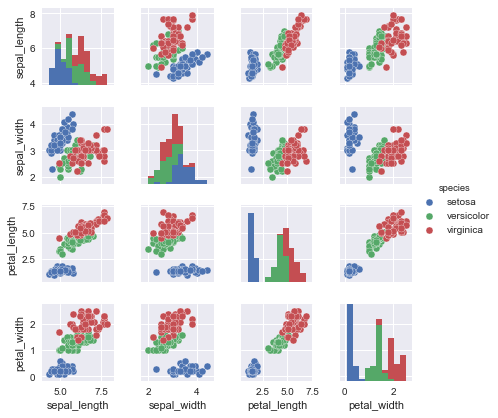

In [3]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue = 'species', size=1.5);

In [4]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [5]:
Y_iris = iris['species']
Y_iris.shape

(150,)

### Scikit-Learn 의 Estimator API

- 일관성 : 모든 객체는 일관된 문서를 갖춘 제한된 메서드 집합에서 비롯된 공통 인터페이스를 공유한다.<br>
- 검사(insepection) : 모든 지정된 모수(parameter) 값은 공개(public) 속성으로 노출된다.<br>
- 제한된 객체 계층구조 : 알고리즘만 파이썬 클래스에 의해 표현되고, 데이터세트는 표준 포맷(NumPy 배열, Panda DadaFrame.Scipy 희박 행력)으로 표현되며 매개변수명은 표준 파이썬 문자열을 사용한다.<br>
- 구성 : 많은 머신러닝 작업은 가본 알고리즘의 시퀀스로 나타낼 수 있으며, Scikit-Learn은 가능한 곳이라면 어디서든지 이방식을 사용한다.<br>
- 합리적인 기본값 : 모델이 사용자 지정 모수를 필요로 할 때, 라이브러리가 적절한 기본값을 정의한다.
    

#### API 기초

1. Scikit_learn으로부터 적절한 추정기(setimator) 클래스를 임포트해서 모델의 클래스를 선택한다. <br>
2. 이 클래스를 원하는 값으로 인스턴스화해서 모델의 초모수(hyoerparameters)를 선택한다.<br>
3. 데이터를 앞에서 논의한 내용에 따라 특징 배열과 대상벡터로 배치한다.<br>
4. 모델 인스턴스의 fit() 메서드를 호출해 모델을 데이터에 적합시킨다. <br>
5. 모델을 새 데이터에 적용한다.<br>
- 지도학습인 경우, 대체로 predict() 매서드를 사용해 알려지지 않은 데이터에 대한 레이블을 예측한다.<br>
- 비지도학습인 경우, 대체로  transform()이나 predict() 메서드를 사용해 데이터의 속성을 변환하거나 추론한다.

#### 지도학습 예제: 간단한 선형 회귀

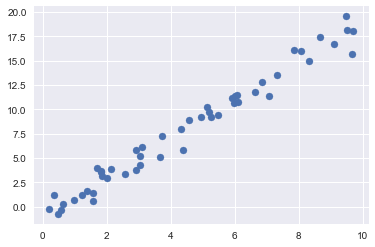

In [6]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [10]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
model.coef_

array([1.9776566])

In [12]:
model.intercept_

-0.9033107255311164

In [13]:
xfit = np.linspace(-1, 11)

In [14]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

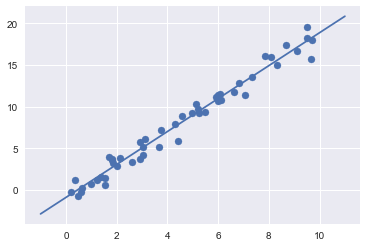

In [15]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

#### 지도학습 예제: 붓꽃 분류

In [16]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, Y_iris, random_state=1)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
Xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
54,6.5,2.8,4.6,1.5
108,6.7,2.5,5.8,1.8
112,6.8,3.0,5.5,2.1
17,5.1,3.5,1.4,0.3
119,6.0,2.2,5.0,1.5


In [18]:
Xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


In [19]:
ytrain.head()

54     versicolor
108     virginica
112     virginica
17         setosa
119     virginica
Name: species, dtype: object

In [20]:
ytest.head()

14         setosa
98     versicolor
75     versicolor
16         setosa
131     virginica
Name: species, dtype: object

In [21]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtrain)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(ytrain, y_model)

0.9464285714285714

#### 비지도 학습 예제: 붓꽃 차원

In [23]:
from sklearn.decomposition import PCA
model = PCA(n_components = 2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

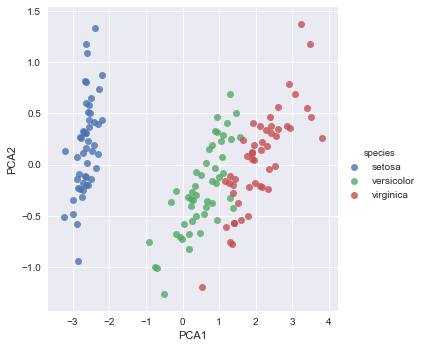

In [24]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue = 'species', data = iris, fit_reg=False);

#### 비지도 학습: 붓꽃 군집화

In [31]:
from sklearn.mixture import GaussianMixture 
model = GaussianMixture(n_components = 3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

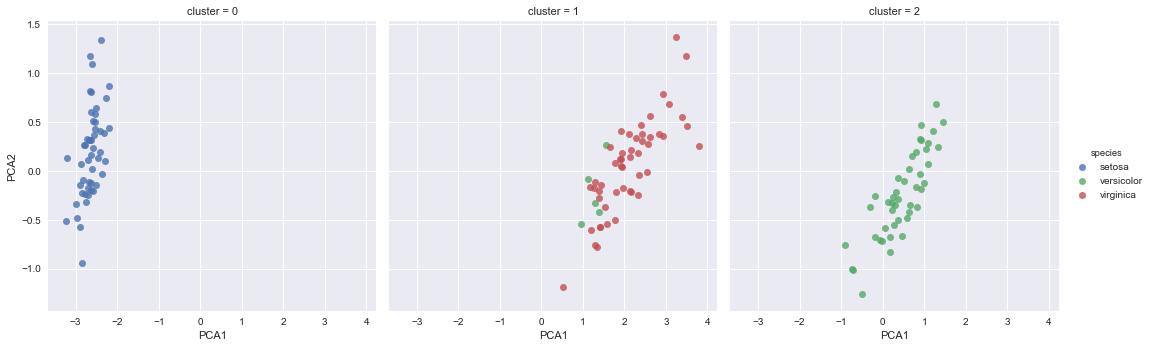

In [32]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

### 응용: 손으로 쓴 숫자 탐색

#### 숫자 데이터 적재 및 시각화

In [33]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

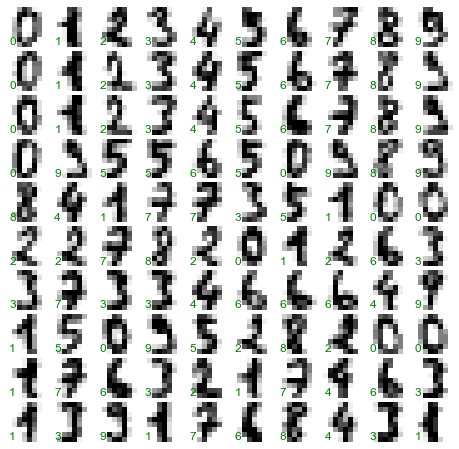

In [34]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize = (8,8), 
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')                     

In [35]:
X = digits.data
X.shape

(1797, 64)

In [36]:
y = digits.target
y.shape

(1797,)

#### 비지도 학습:차원 축소

In [38]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

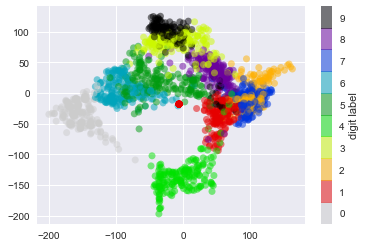

In [39]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolors='none', alpha=0.5,
           cmap=plt.cm.get_cmap('nipy_spectral_r', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

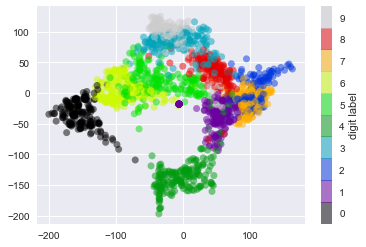

In [40]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolors='none', alpha=0.5,
           cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

#### 숫자 분류

In [41]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=0)

In [42]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8249158249158249

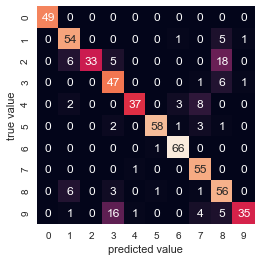

In [44]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)

plt.xlabel('predicted value')
plt.ylabel('true value');

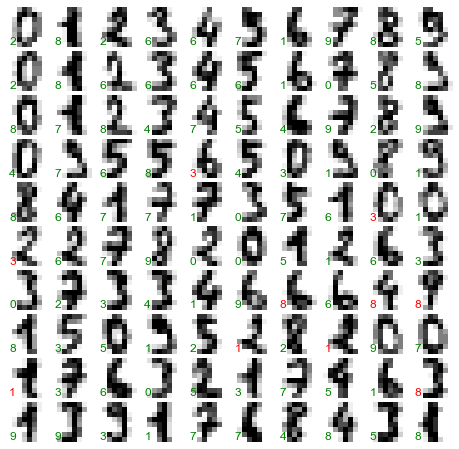

In [45]:
fig, axes = plt.subplots(10, 10, figsize=(8,8), 
                subplot_kw={'xticks':[], 'yticks':[]}, 
                gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]), 
            transform=ax.transAxes, 
            color='green' if(ytest[i] == y_model[i]) else 'red')